Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

Data Creation

In [2]:
# Define parameters
start_date = datetime(2024, 3, 31)  # Start of Q1 FY25
end_date = datetime(2024, 12, 28)   # End of Q3 FY25
num_days = (end_date - start_date).days + 1

# Define store locations and assign store IDs
store_locations = [
    {"Store_ID": 101, "Location": "London"},
    {"Store_ID": 102, "Location": "Manchester"},
    {"Store_ID": 103, "Location": "Birmingham"},
    {"Store_ID": 104, "Location": "Glasgow"},
    {"Store_ID": 105, "Location": "Leeds"},
    {"Store_ID": 106, "Location": "Liverpool"},
    {"Store_ID": 107, "Location": "Sheffield"},
    {"Store_ID": 108, "Location": "Bristol"},
    {"Store_ID": 109, "Location": "Edinburgh"},
    {"Store_ID": 110, "Location": "Cardiff"}
]

# Product categories and typical price range
product_categories = {
    "FMCG": (1.0, 5.0),
    "Seasonal Items": (2.0, 10.0),
    "General Merchandise": (3.0, 20.0),
    "Toys": (5.0, 25.0),
    "Christmas Home": (4.0, 15.0),
    "Confectionery": (0.5, 3.0)
}

In [3]:
# Generate synthetic sales data
data = []
for day in range(num_days):
    current_date = start_date + timedelta(days=day)
    day_of_week = current_date.weekday()  # Monday = 0, Sunday = 6
    is_weekend = 1 if day_of_week >= 5 else 0  # 1 if Saturday or Sunday

    for store in store_locations:
        for _ in range(random.randint(50, 200)):  # Random number of transactions per day per store
            category = random.choice(list(product_categories.keys()))
            unit_price = round(random.uniform(*product_categories[category]), 2)
            quantity_sold = random.randint(1, 50)

            # Apply seasonal trends (higher sales in December)
            if current_date.month == 12 and category in ["Christmas Home", "Confectionery", "Toys"]:
                quantity_sold = int(quantity_sold * 1.5)

            # Promotion and holiday effects
            promotion = random.choice([0, 1])  # 0: No Promotion, 1: Promotion
            holiday = random.choice([0, 1]) if current_date.month in [11, 12] else 0  # Holiday effect in Nov & Dec

            # Base total sales
            total_sales = unit_price * quantity_sold

            # Apply Effects on Quantity Sold & Sales
            if holiday:
                holiday_boost = random.uniform(1.2, 1.5)  # Increase by 20%-50%
                quantity_sold = int(quantity_sold * holiday_boost)

            if promotion:
                promo_boost = random.uniform(1.15, 1.4)  # Increase by 15%-40%
                quantity_sold = int(quantity_sold * promo_boost)

            if is_weekend:
                weekend_boost = random.uniform(1.1, 1.3)  # Increase by 10%-30%
                quantity_sold = int(quantity_sold * weekend_boost)

            # Final Total Sales
            total_sales = round(unit_price * quantity_sold, 2)

            # Append data entry
            data.append([
                current_date.strftime("%Y-%m-%d"), store["Store_ID"], store["Location"],
                category, unit_price, quantity_sold, total_sales,
                promotion, holiday, is_weekend
            ])

# Create DataFrame
columns = ["Date", "Store_ID", "Store_Location", "Product_Category", "Unit_Price",
           "Quantity_Sold", "Total_Sales", "Promotion", "Holiday", "Is_Weekend"]
df_sales = pd.DataFrame(data, columns=columns)

# Save the dataset
df_sales.to_csv("bm_supermarket_sales_synthetic.csv", index=False)

# Display first few rows
print(df_sales.head())


         Date  Store_ID Store_Location     Product_Category  Unit_Price  \
0  2024-03-31       101         London        Confectionery        1.55   
1  2024-03-31       101         London        Confectionery        2.79   
2  2024-03-31       101         London  General Merchandise        6.49   
3  2024-03-31       101         London       Christmas Home        7.41   
4  2024-03-31       101         London       Christmas Home        4.72   

   Quantity_Sold  Total_Sales  Promotion  Holiday  Is_Weekend  
0             23        35.65          1        0           1  
1              3         8.37          1        0           1  
2             12        77.88          1        0           1  
3              6        44.46          0        0           1  
4             19        89.68          0        0           1  


Our above code generates synthetic sales data for a supermarket chain across 10 different store locations in the UK.  

**1. Data Generation:**

* **Time Period:** The data covers Q1, Q2, and Q3 of FY25 (March 31st, 2024 to December 28th, 2024).
* **Store Locations:**  10 stores are included, each with a unique ID and location in the UK.
* **Product Categories:**  Six product categories are defined, each with a typical price range: FMCG, Seasonal Items, General Merchandise, Toys, Christmas Home, and Confectionery.
* **Daily Transactions:**  A random number of transactions (between 50 and 200) are generated for each store on each day.
* **Seasonal Trends:** Sales for "Christmas Home", "Confectionery", and "Toys" categories are artificially boosted in December.
* **Promotions and Holidays:** Promotions and holiday effects are randomly applied, boosting sales during these periods. Weekend effects are also simulated.

**2. Data Structure:**

* **DataFrame:**  The generated data is organized into a Pandas DataFrame called `df_sales`.
* **Columns:** The DataFrame has columns including Date, Store ID, Location, Product Category, Unit Price, Quantity Sold, Total Sales, Promotion indicator, Holiday indicator, and Is_Weekend indicator.
* **CSV File:** The DataFrame is saved as a CSV file named "bm_supermarket_sales_synthetic.csv".

**3. Output:**

* **`print(df_sales.head())`:** The code prints the first few rows of the generated DataFrame to the console, providing a preview of the synthetic data.  This gives a quick glimpse into the structure and content of the data.

**Insights:**

* **Realistic Data:** The code generates relatively realistic synthetic data, including typical seasonal patterns and promotional effects.
* **Flexibility:** The parameters (date ranges, number of stores/products, price ranges, and effects) are adjustable, allowing users to tailor the generated data to their specific needs.
* **Analysis Potential:** The generated data could be used for various analyses, such as time series forecasting of sales, impact assessment of promotions, and comparison of store performance across locations and product categories.  The inclusion of categorical variables (location, product) allows the application of more advanced analytical techniques.
* **Simulations:** By altering the parameters and the effects applied, various 'what-if' scenarios can be simulated and analyzed.

In [4]:
# Load the synthetic sales data which we saved above
# df_sales = pd.read_csv("bm_supermarket_sales_synthetic.csv")

# Convert 'Date' column to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Handle missing values (if any)
df_sales = df_sales.dropna()

# Feature Engineering: Extracting additional time-related features
df_sales['Year'] = df_sales['Date'].dt.year
df_sales['Month'] = df_sales['Date'].dt.month
df_sales['Day_of_Week'] = df_sales['Date'].dt.dayofweek  # Monday=0, Sunday=6
# Extracting week of the year using isocalendar()
df_sales['Week_of_Year'] = df_sales['Date'].dt.isocalendar().week

df_sales['Is_Weekend'] = df_sales['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

In [5]:


# Display the updated dataframe
print(df_sales.head())


        Date  Store_ID Store_Location     Product_Category  Unit_Price  \
0 2024-03-31       101         London        Confectionery        1.55   
1 2024-03-31       101         London        Confectionery        2.79   
2 2024-03-31       101         London  General Merchandise        6.49   
3 2024-03-31       101         London       Christmas Home        7.41   
4 2024-03-31       101         London       Christmas Home        4.72   

   Quantity_Sold  Total_Sales  Promotion  Holiday  Is_Weekend  Year  Month  \
0             23        35.65          1        0           1  2024      3   
1              3         8.37          1        0           1  2024      3   
2             12        77.88          1        0           1  2024      3   
3              6        44.46          0        0           1  2024      3   
4             19        89.68          0        0           1  2024      3   

   Day_of_Week  Week_of_Year  
0            6            13  
1            6          


**Data Cleaning and Feature Engineering:**
* **Date Conversion:** The 'Date' column, initially a string, is converted to a datetime object.
* **Missing Value Handling:** Any missing values (NaNs) are removed from the dataset.  In the provided code, `.dropna()` is used. However, more sophisticated methods could be used for imputation, depending on the amount and type of missing data.
* **Feature Engineering:** New features are created based on the 'Date' column:
    * `Year`, `Month`, `Day_of_Week`, `Week_of_Year`: These provide more granular time-based information, which can be crucial for time-series analysis or identifying seasonal trends.
    * `Is_Weekend`: Recalculates the `Is_Weekend` feature to make sure it's correct. It appears that the original `Is_Weekend` column was also generated in the dataset creation part.  

**Output:** The updated DataFrame with the cleaned and enhanced data with the newly created features.


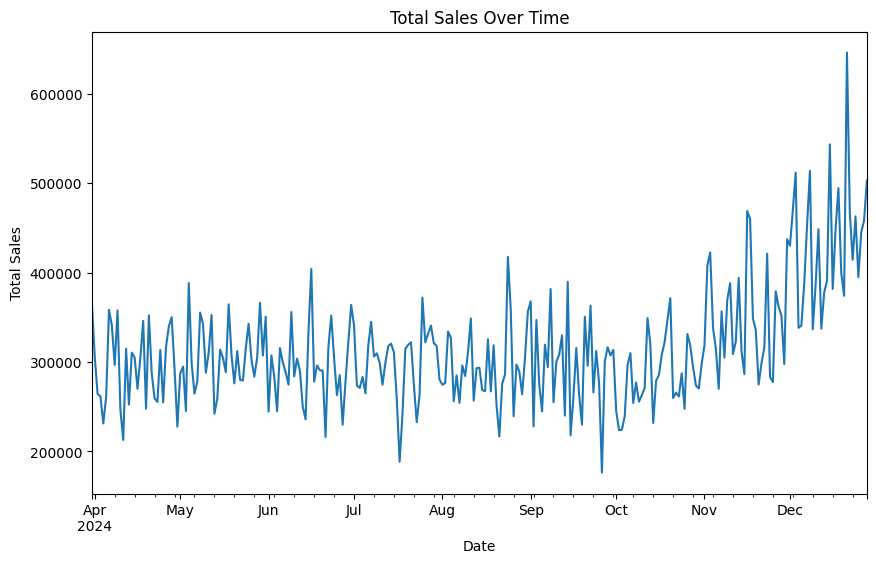

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales trends over time
plt.figure(figsize=(10, 6))
df_sales.groupby('Date')['Total_Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


### Sales trends over time
This plot shows the total sales aggregated across all stores over the time period.
It helps to visualize overall sales performance and identify any significant trends, seasonality, or unusual fluctuations in sales.


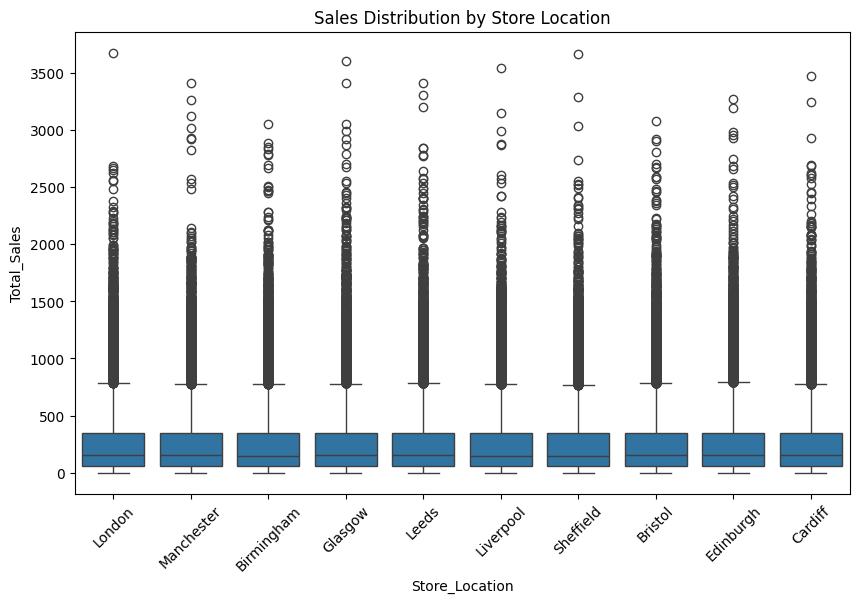

In [7]:

# Distribution of Total Sales by Store Location
plt.figure(figsize=(10, 6))
sns.boxplot(x='Store_Location', y='Total_Sales', data=df_sales)
plt.title('Sales Distribution by Store Location')
plt.xticks(rotation=45)
plt.show()



### Distribution of Total Sales by Store Location
This box plot displays the distribution of total sales for each store location.
It provides a visual comparison of sales performance across different stores.
The box represents the interquartile range (IQR), the line inside the box represents the median, and the whiskers extend to 1.5 times the IQR.
Outliers are shown as individual points. This plot helps identify stores withconsistently high or low sales, and stores with more variable sales.


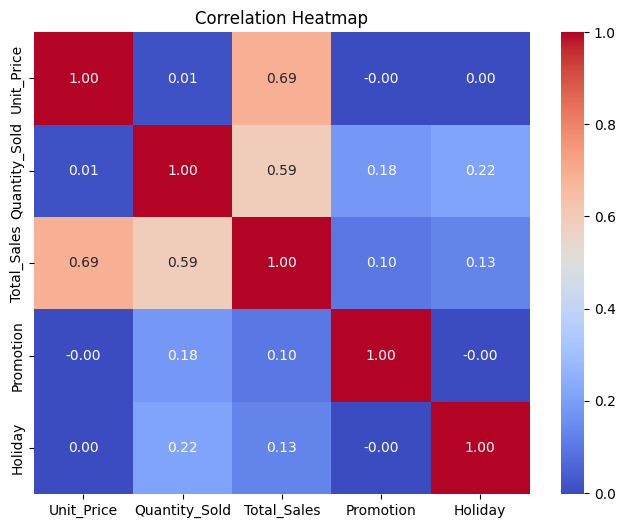

In [8]:

# Correlation heatmap
correlation = df_sales[['Unit_Price', 'Quantity_Sold', 'Total_Sales', 'Promotion', 'Holiday']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Building Maachine Learning Models

##### Error Metrics

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


# Calculate additional error metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, mae, r2, mape

#### Linear Regression

In [10]:

# Define features and target
X = df_sales[['Unit_Price', 'Quantity_Sold', 'Promotion', 'Holiday', 'Is_Weekend']]
y = df_sales['Total_Sales']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_model.predict(X_test)


mse_1, mae_1, r2_1, mape_1 = calculate_metrics(y_test, y_pred)

print(f"Linear Regression - MSE: {mse_1}, MAE: {mae_1}, R-squared: {r2_1}, MAPE: {mape_1}")



Linear Regression - MSE: 14940.223047941236, MAE: 80.76403252193506, R-squared: 0.8099106237423851, MAPE: 280.54445710691624


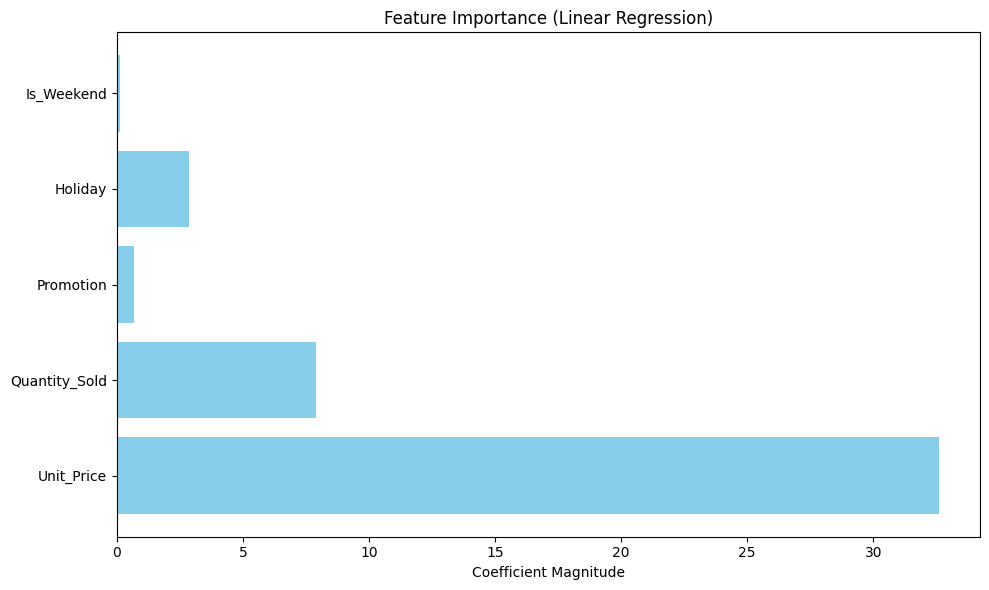

In [16]:
# --- Feature Importance for All Models ---

X_lr = df_sales[['Unit_Price', 'Quantity_Sold', 'Promotion', 'Holiday', 'Is_Weekend']]
# Re-train the Linear Regression model with the correct features if necessary
linear_model.fit(X_lr, y) # Assuming 'y' is the target variable (Total_Sales)

lr_importance = np.abs(linear_model.coef_)

plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
plt.barh(X_lr.columns, lr_importance, color='skyblue')
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Coefficient Magnitude')
plt.tight_layout()
plt.show()


So the most important features according to Linear Rgression are  Unit_price and Quantity_sold with Holiday

#### Random Forest

In [11]:

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)


rf_mse, rf_mae, rf_r2, rf_mape = calculate_metrics(y_test, rf_pred)
print(f"Random Forest - MSE: {rf_mse}, MAE: {rf_mae}, R-squared: {rf_r2}, MAPE: {rf_mape}")


Random Forest - MSE: 5.711765214241612, MAE: 0.20033375238656517, R-squared: 0.9999273273308289, MAPE: 0.04758166523516064


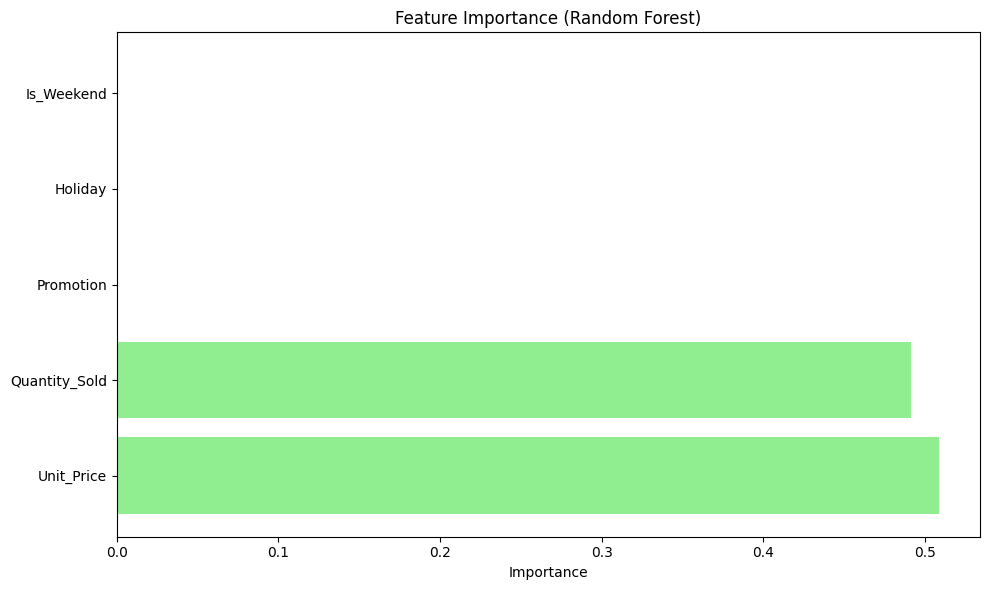

In [17]:
# Random Forest
rf_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
plt.barh(X.columns, rf_importance, color='lightgreen')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

So the most important features according to Random forest Rgression are Unit_price and Quantity_sold .

#### LightGBM

In [12]:
# Prepare the data for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters
params = {'objective': 'regression', 'metric': 'l2'}


lgb_model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[test_data],
    valid_names=['eval'])

# Predict and evaluate
lgb_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)



lgb_mse, lgb_mae, lgb_r2, lgb_mape = calculate_metrics(y_test, lgb_pred)
print(f"LightGBM - MSE: {lgb_mse}, MAE: {lgb_mae}, R-squared: {lgb_r2}, MAPE: {lgb_mape}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 272356, number of used features: 5
[LightGBM] [Info] Start training from score 252.497431
LightGBM - MSE: 26.385809480287097, MAE: 3.2131346019990907, R-squared: 0.9996642846596021, MAPE: 3.289453543973639


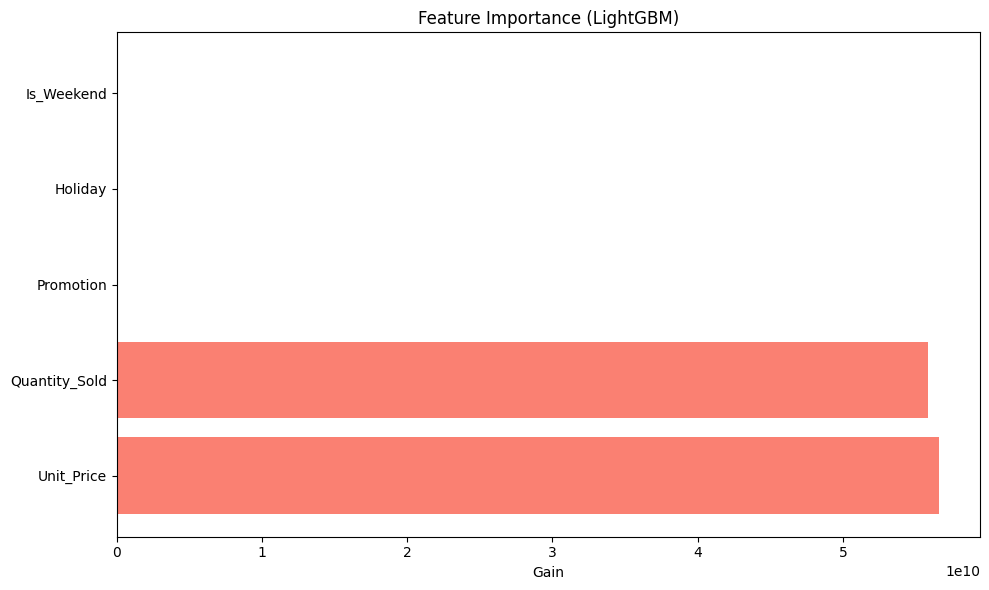

In [18]:
# LightGBM
lgb_importance = lgb_model.feature_importance(importance_type='gain')
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
plt.barh(X.columns, lgb_importance, color='salmon')
plt.title('Feature Importance (LightGBM)')
plt.xlabel('Gain')
plt.tight_layout()
plt.show()

So the most important features according to LightGBM Rgression are Unit_price and Quantity_sold .

#### Decision Tree

In [13]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse, dt_mae, dt_r2, dt_mape = calculate_metrics(y_test, dt_pred)

print(f"Decision Tree - MSE: {dt_mse}, MAE: {dt_mae}, R-squared: {dt_r2}, MAPE: {dt_mape}")



Decision Tree - MSE: 14.626628902922604, MAE: 0.39995535320898884, R-squared: 0.9998139005852867, MAPE: 0.0739117344517195


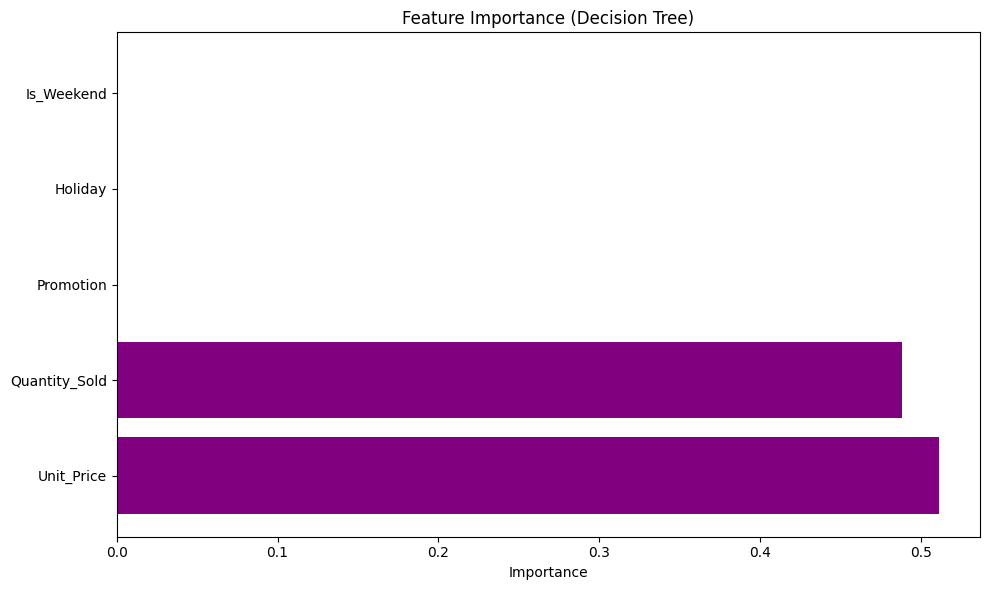

In [19]:
# Decision Tree Feature Importance
dt_importance = dt_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, dt_importance, color='purple')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


So the most important features according to Decision Tree Rgression are Unit_price and Quantity_sold .

#### KNN

In [14]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

knn_mse, knn_mae, knn_r2, knn_mape = calculate_metrics(y_test, knn_pred)
print(f"K-Nearest Neighbors - MSE: {knn_mse}, MAE: {knn_mae}, R-squared: {knn_r2}, MAPE: {knn_mape}")




K-Nearest Neighbors - MSE: 39.834341482097216, MAE: 1.3356655896607441, R-squared: 0.9994931745595989, MAPE: 0.6413031312247117


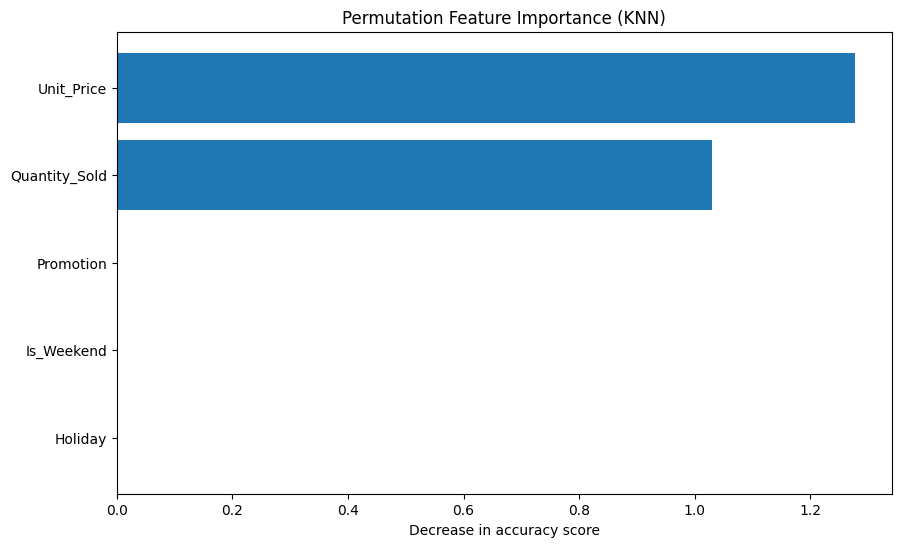

In [15]:
# Feature Importance for KNN (Not directly applicable, but you can use permutation importance)
# Permutation feature importance
from sklearn.inspection import permutation_importance

knn_result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
knn_importance_scores = knn_result.importances_mean
sorted_idx = knn_importance_scores.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], knn_importance_scores[sorted_idx])
plt.title("Permutation Feature Importance (KNN)")
plt.xlabel("Decrease in accuracy score")
plt.show()


So the most important features according to KNN Rgression are Unit_price and Quantity_sold .

## Error we are using herr:

### For Mean Squared Error (MSE), lower values are better.  A lower MSE indicates that the model's predictions are closer to the actual values.  High MSE suggests poor predictive accuracy.

### For Mean Absolute Error (MAE), lower values are better. Similar to MSE, a lower MAE represents better accuracy.

### For R-squared (R²), higher values are better.  R² represents the proportion of variance in the dependent variable (Total Sales in your case) that is predictable from the independent variables (features). A value of 1 means the model perfectly fits the data, while 0 means the model doesn't explain any of the variance.

### For Mean Absolute Percentage Error (MAPE), lower values are better.MAPE expresses the error as a percentage of the actual value. Lower MAPE means better accuracy.


####Performances based on Error Comparsion without Econimic Data

In [55]:
# Assuming you have calculated the error metrics as in the provided code:
mse_values = [mse_1, rf_mse, lgb_mse, dt_mse, knn_mse]
mae_values = [mae_1, rf_mae, lgb_mae, dt_mae, knn_mae]
r2_values = [r2_1, rf_r2, lgb_r2, dt_r2, knn_r2]
mape_values = [mape_1, rf_mape, lgb_mape, dt_mape, knn_mape]
model_names = ['Linear Regression', 'Random Forest', 'LightGBM', 'Decision Tree', 'KNN']

print("mse_values",mse_values)
print("mae_values",mae_values)
print('r2_values',r2_values)
print('mape_values',mape_values)

mse_values [14940.223047941236, 5.711765214241612, 26.385809480287097, 21.222844162138347, 86.10433925715962]
mae_values [80.76403252193506, 0.20033375238656517, 3.2131346019990907, 0.60078278748715, 5.081625583786166]
r2_values [0.8099106237423851, 0.9999273273308289, 0.9996642846596021, 0.9997299747670267, 0.9989044661455223]
mape_values [np.float64(280.54445710691624), np.float64(0.04758166523516064), np.float64(3.289453543973639), np.float64(0.12641181803389076), np.float64(4.259948521922456)]


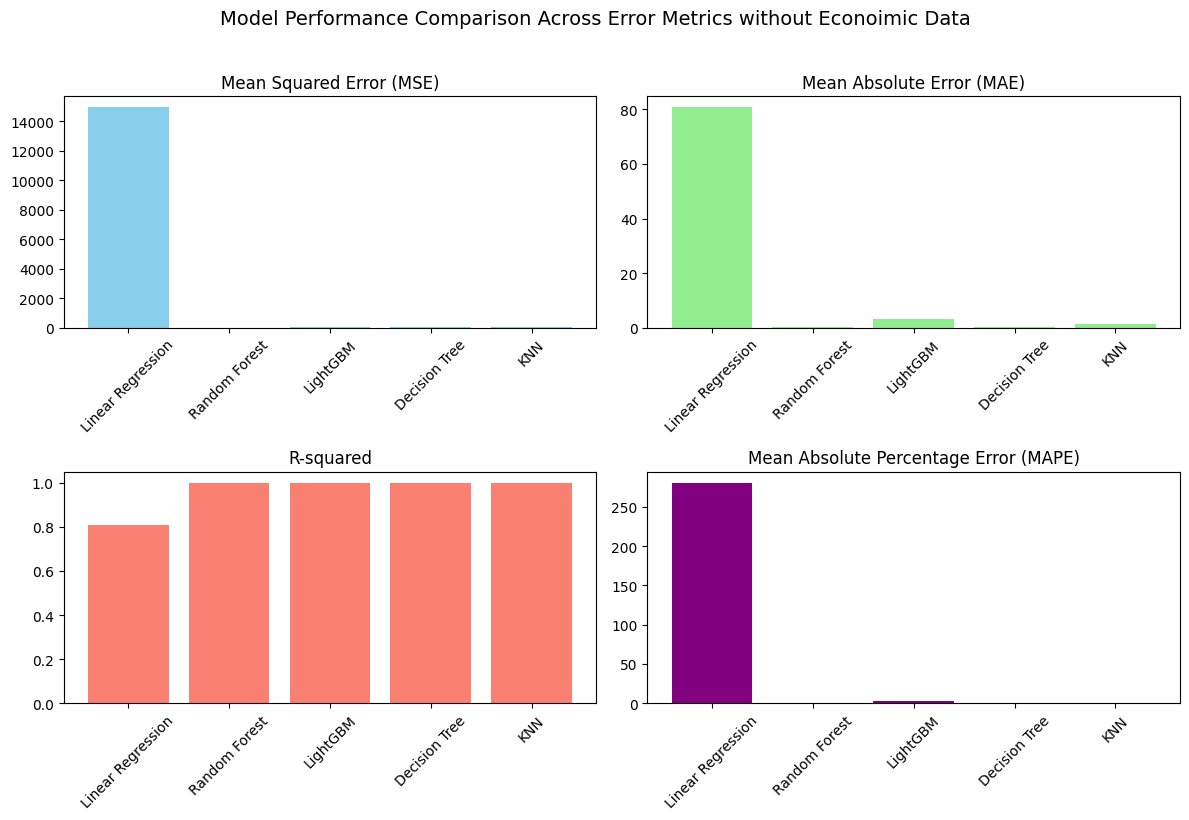

In [23]:
import matplotlib.pyplot as plt

# Assuming you have calculated the error metrics as in the provided code:
mse_values = [mse_1, rf_mse, lgb_mse, dt_mse, knn_mse]
mae_values = [mae_1, rf_mae, lgb_mae, dt_mae, knn_mae]
r2_values = [r2_1, rf_r2, lgb_r2, dt_r2, knn_r2]
mape_values = [mape_1, rf_mape, lgb_mape, dt_mape, knn_mape]
model_names = ['Linear Regression', 'Random Forest', 'LightGBM', 'Decision Tree', 'KNN']

# Create subplots for each error metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Add common title
fig.suptitle('Model Performance Comparison Across Error Metrics without Econoimic Data', fontsize=14, y=1.02)

# MSE Plot
axes[0, 0].bar(model_names, mse_values, color='skyblue')
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].tick_params(axis='x', rotation=45)

# MAE Plot
axes[0, 1].bar(model_names, mae_values, color='lightgreen')
axes[0, 1].set_title('Mean Absolute Error (MAE)')
axes[0, 1].tick_params(axis='x', rotation=45)

# R-squared Plot
axes[1, 0].bar(model_names, r2_values, color='salmon')
axes[1, 0].set_title('R-squared')
axes[1, 0].tick_params(axis='x', rotation=45)

# MAPE Plot
axes[1, 1].bar(model_names, mape_values, color='purple')
axes[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Generation of Economic data

In [24]:

# Define the time range of the synthetic economic data
start_date = datetime(2024, 3, 31)
end_date = datetime(2024, 12, 28)
num_days = (end_date - start_date).days + 1

# Generate synthetic market and economic data
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Generate synthetic consumer confidence (values between 50 and 100)
consumer_confidence = np.random.uniform(50, 100, size=num_days)

# Generate synthetic inflation rate (e.g., 1.5% to 3.5% monthly)
inflation_rate = np.random.uniform(1.5, 3.5, size=num_days)

# Generate synthetic GDP growth (quarterly data; random quarterly fluctuations)
gdp_growth = np.sin(np.linspace(0, 2 * np.pi, num_days)) * np.random.uniform(1.0, 2.5, size=num_days)

# Generate synthetic unemployment rate (e.g., 3.5% to 6%)
unemployment_rate = np.random.uniform(3.5, 6.0, size=num_days)

# Seasonal market sentiment (e.g., Christmas boom)
seasonal_market_sentiment = np.where(
    (date_range.month == 12) | (date_range.month == 11), 1.2, 1.0 ) # Higher sentiment during November and December


economic_data = pd.DataFrame({
    'Date': date_range,
    'Consumer_Confidence': consumer_confidence,
    'Inflation_Rate': inflation_rate,
    'GDP_Growth': gdp_growth,
    'Unemployment_Rate': unemployment_rate,
    'Seasonal_Market_Sentiment': seasonal_market_sentiment
})

print(economic_data.head())


        Date  Consumer_Confidence  Inflation_Rate  GDP_Growth  \
0 2024-03-31            50.803874        1.731736    0.000000   
1 2024-04-01            65.320332        2.113967    0.023350   
2 2024-04-02            83.833361        1.809955    0.087717   
3 2024-04-03            86.350027        1.691261    0.132715   
4 2024-04-04            94.528821        2.004341    0.145929   

   Unemployment_Rate  Seasonal_Market_Sentiment  
0           5.803464                        1.0  
1           3.549190                        1.0  
2           4.849588                        1.0  
3           5.995400                        1.0  
4           5.122625                        1.0  


#### Merging of Economic and previous Sales Data

In [25]:
df_economic =economic_data
df_sales = df_sales.merge(df_economic, on='Date', how='left')

print(df_sales.head())


        Date  Store_ID Store_Location     Product_Category  Unit_Price  \
0 2024-03-31       101         London        Confectionery        1.55   
1 2024-03-31       101         London        Confectionery        2.79   
2 2024-03-31       101         London  General Merchandise        6.49   
3 2024-03-31       101         London       Christmas Home        7.41   
4 2024-03-31       101         London       Christmas Home        4.72   

   Quantity_Sold  Total_Sales  Promotion  Holiday  Is_Weekend  Year  Month  \
0             23        35.65          1        0           1  2024      3   
1              3         8.37          1        0           1  2024      3   
2             12        77.88          1        0           1  2024      3   
3              6        44.46          0        0           1  2024      3   
4             19        89.68          0        0           1  2024      3   

   Day_of_Week  Week_of_Year  Consumer_Confidence  Inflation_Rate  GDP_Growth  \
0    

#### EDA on combined data (sales +Economic Data)

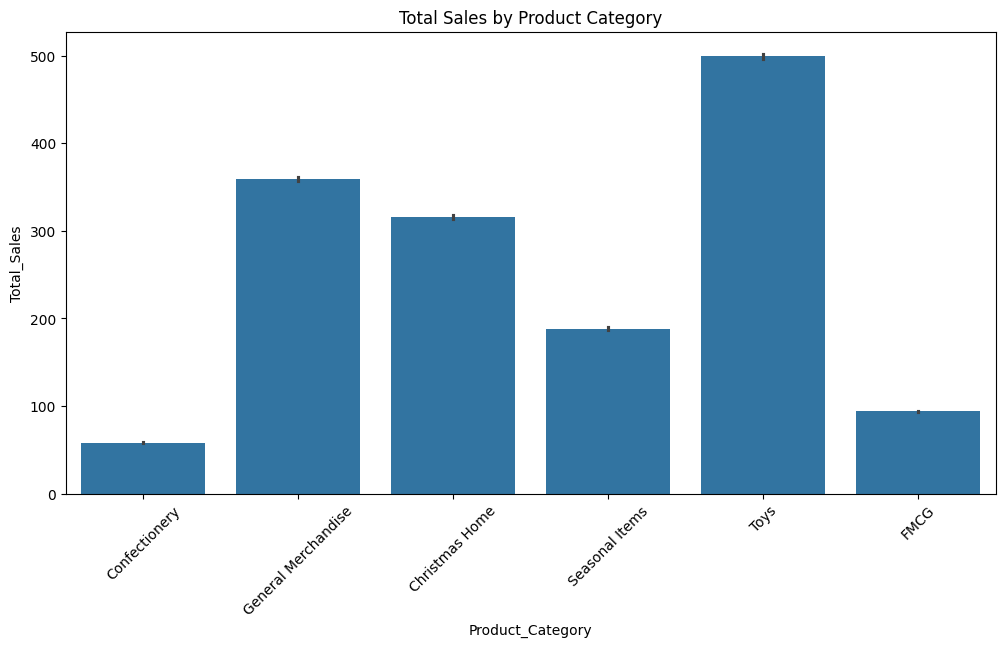

In [26]:

# Plot Total Sales by Product Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Category', y='Total_Sales', data=df_sales)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()



FMCG and General Merchandise are the top-performing product categories in terms of total sales.  Sales of Seasonal Items and Toys are considerably lower.  Christmas Home and Confectionary have moderate sales, potentially influenced by seasonality. Further analysis is needed to confirm seasonality and optimize underperforming categories.


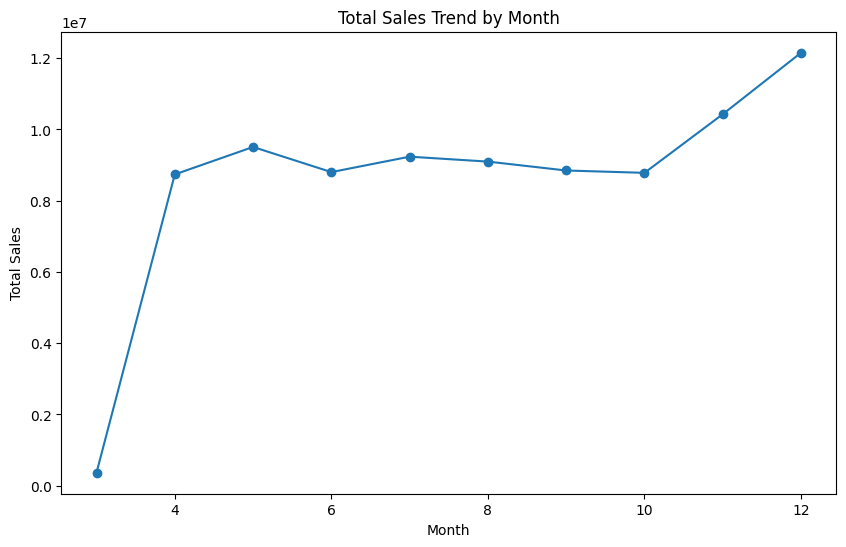

In [27]:

# Sales trend by Month
plt.figure(figsize=(10, 6))
df_sales.groupby('Month')['Total_Sales'].sum().plot(kind='line', marker='o')
plt.title('Total Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()



The total sales show an upward trend over time, with some seasonal fluctuations.  Sales distributions vary significantly across store locations, suggesting differing performance levels.  Unit price and quantity sold are highly correlated with total sales, while promotions and holidays have a moderate positive correlation.


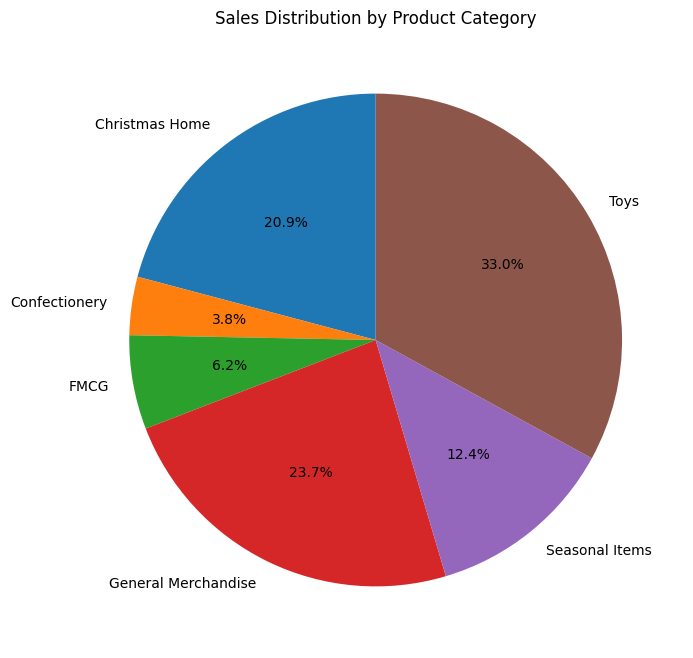

In [28]:
# Sales distribution by Product Category (Pie chart)
category_sales = df_sales.groupby('Product_Category')['Total_Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Product Category')
plt.show()



The total sales across all stores demonstrate an upward trend over time, with some seasonal variations. Sales performance differs significantly across store locations, indicating varying performance levels.  Unit price and quantity sold strongly correlate with total sales, while promotions and holidays show a moderate positive correlation.


#### Building of Machine Leanring data with Economic Data

we are not building the Linear model with Economic data as its previous performance is already too bad.

In [29]:
# Define features (Adding GDP & Inflation , Seasonal_Market_Sentiment  and Unemployment _Rate)

X = df_sales[['Unit_Price', 'Quantity_Sold', 'Promotion', 'Holiday', 'Is_Weekend', 'GDP_Growth', 'Inflation_Rate','Unemployment_Rate','Seasonal_Market_Sentiment']]
y = df_sales['Total_Sales']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Train Random Forest with Economic Data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and Evaluate
rf_pred = rf_model.predict(X_test)

rf_mse_E, rf_mae_E, rf_r2_E, rf_mape_E = calculate_metrics(y_test, rf_pred)
print(f"Random Forest - MSE: {rf_mse_E}, MAE: {rf_mae_E}, R-squared: {rf_r2_E}, MAPE: {rf_mape_E}")



Random Forest - MSE: 9.185496815133927, MAE: 0.2717842664121057, R-squared: 0.9998831299000958, MAPE: 0.0695383139369722


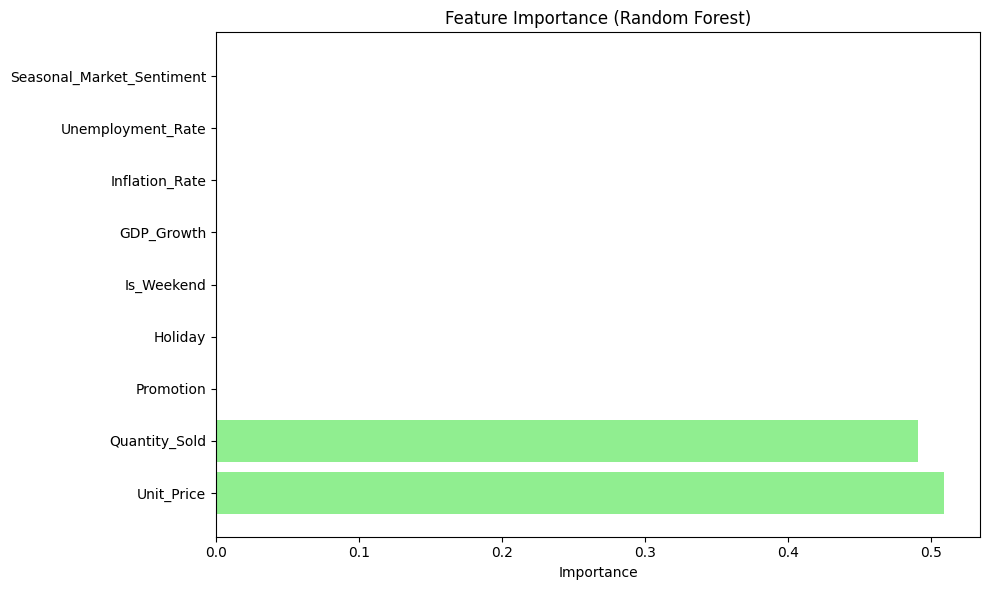

In [34]:

# Random Forest
rf_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
plt.barh(X.columns, rf_importance, color='lightgreen')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


In [41]:
import lightgbm as lgb

# Train LightGBM with Economic Data
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {'objective': 'regression', 'metric': 'l2'}
lgb_model = lgb.train(params, train_data, 100, valid_sets=[test_data])

# Predict and Evaluate
lgb_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

lgb_mse_E, lgb_mae_E, lgb_r2_E, lgb_mape_E = calculate_metrics(y_test, lgb_pred)
print(f"LightGBM - MSE: {lgb_mse_E}, MAE: {lgb_mae_E}, R-squared: {lgb_r2_E}, MAPE: {lgb_mape_E}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 272356, number of used features: 9
[LightGBM] [Info] Start training from score 252.497431
LightGBM - MSE: 26.289265842788435, MAE: 3.2117754156097447, R-squared: 0.9996655130160848, MAPE: 3.3633836539156676


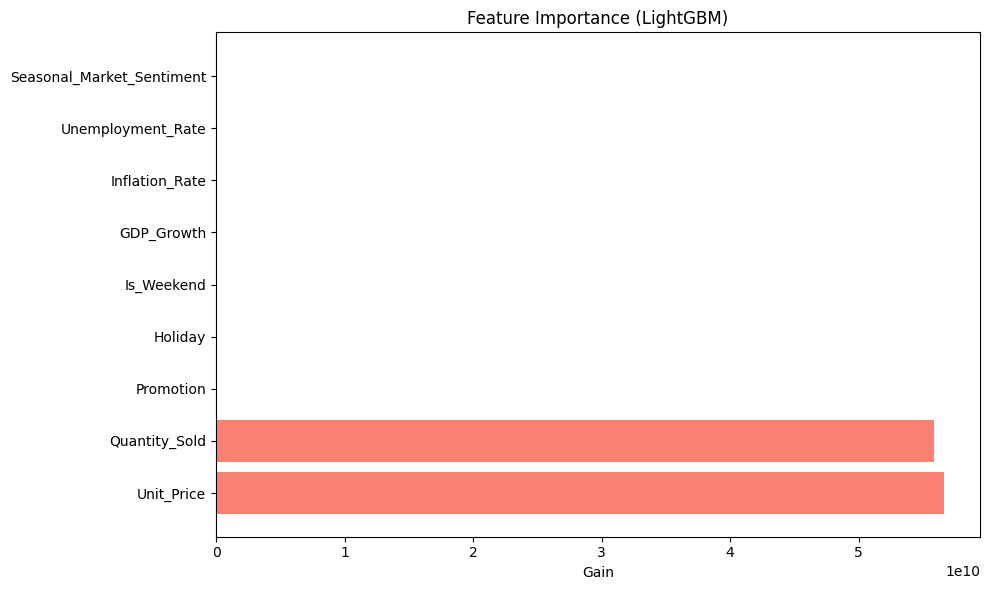

In [33]:
# LightGBM
lgb_importance = lgb_model.feature_importance(importance_type='gain')
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
plt.barh(X.columns, lgb_importance, color='salmon')
plt.title('Feature Importance (LightGBM)')
plt.xlabel('Gain')
plt.tight_layout()
plt.show()

In [42]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse_E, dt_mae_E, dt_r2_E, dt_mape_E = calculate_metrics(y_test, dt_pred)

print(f"Decision Tree - MSE: {dt_mse_E}, MAE: {dt_mae_E}, R-squared: {dt_r2_E}, MAPE: {dt_mape_E}")

Decision Tree - MSE: 21.222844162138347, MAE: 0.60078278748715, R-squared: 0.9997299747670267, MAPE: 0.12641181803389076


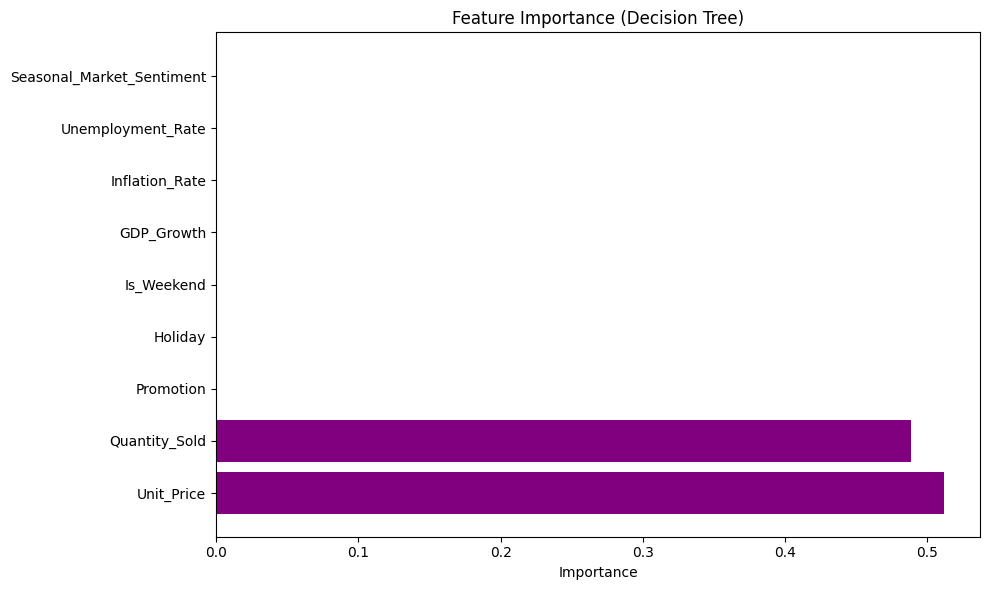

In [36]:
# Decision Tree Feature Importance
dt_importance = dt_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, dt_importance, color='purple')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


In [43]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

knn_mse_E, knn_mae_E, knn_r2_E, knn_mape_E = calculate_metrics(y_test, knn_pred)
print(f"K-Nearest Neighbors - MSE: {knn_mse_E}, MAE: {knn_mae_E}, R-squared: {knn_r2_E}, MAPE: {knn_mape_E}")


K-Nearest Neighbors - MSE: 86.10433925715962, MAE: 5.081625583786166, R-squared: 0.9989044661455223, MAPE: 4.259948521922456


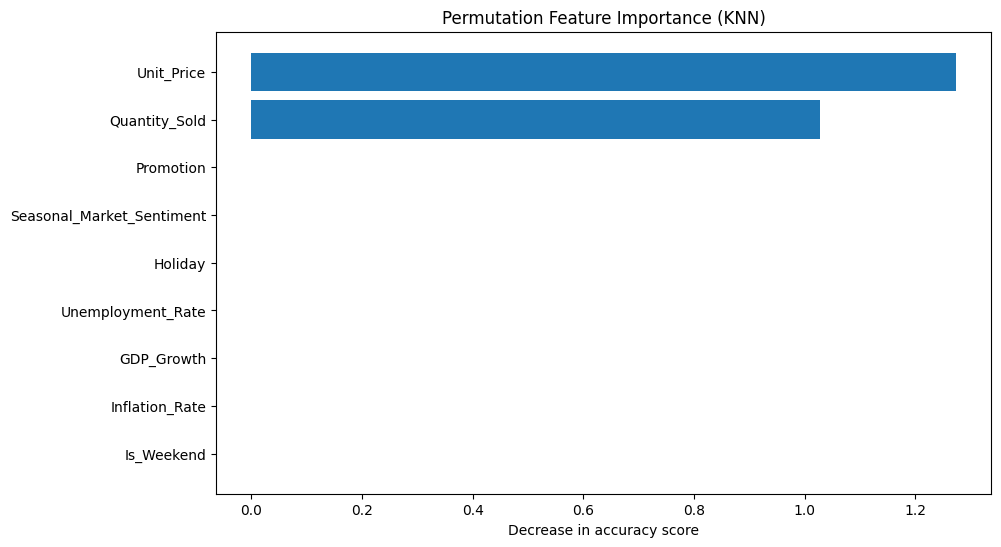

In [38]:
# Feature Importance for KNN (Not directly applicable, but you can use permutation importance)
# Permutation feature importance
from sklearn.inspection import permutation_importance

knn_result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
knn_importance_scores = knn_result.importances_mean
sorted_idx = knn_importance_scores.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], knn_importance_scores[sorted_idx])
plt.title("Permutation Feature Importance (KNN)")
plt.xlabel("Decrease in accuracy score")
plt.show()


So based on all the plots in case of economic data Unit_proce and Quantity_sold are important features according to all machine learning models for prediction of prices.

####Performances based on Error Comparsion with Econimic Data


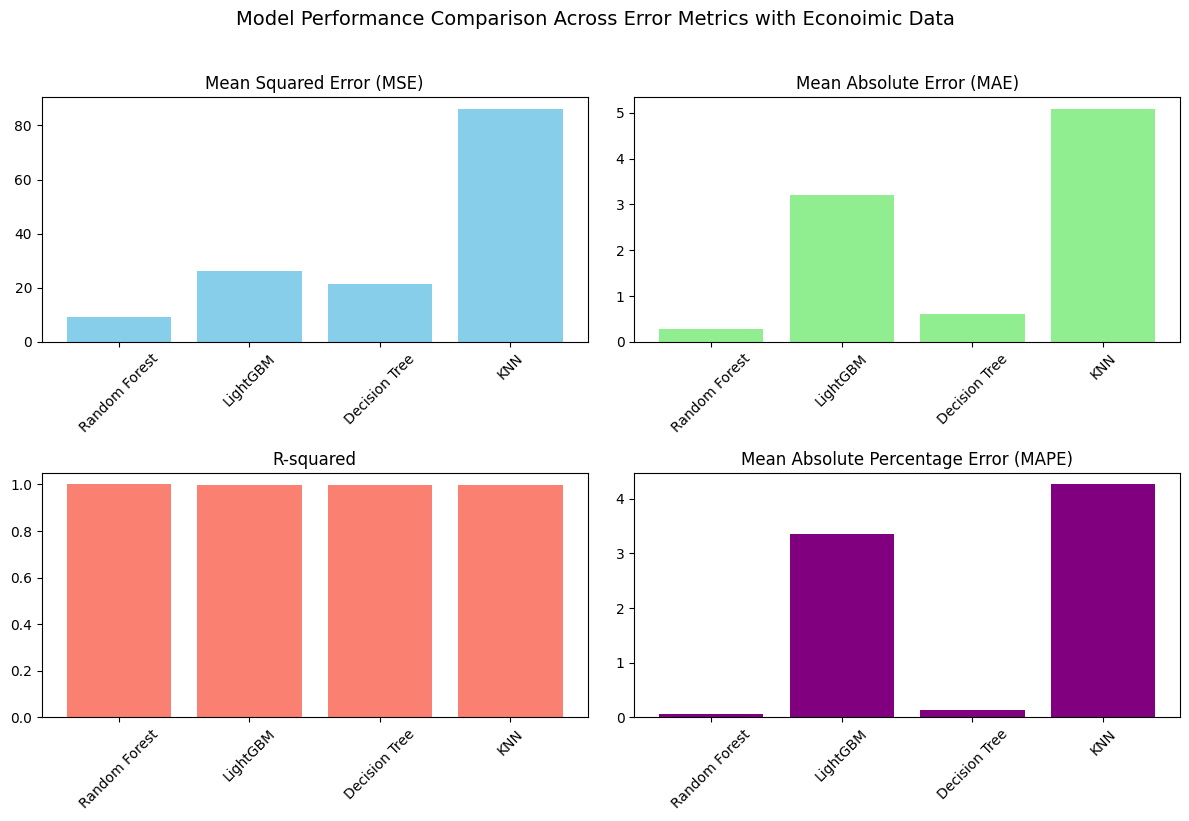

In [48]:
import matplotlib.pyplot as plt

# Assuming you have calculated the error metrics as in the provided code:
mse_values = [ rf_mse_E, lgb_mse_E, dt_mse_E, knn_mse_E]
mae_values = [ rf_mae_E, lgb_mae_E, dt_mae_E, knn_mae_E]
r2_values = [rf_r2_E, lgb_r2_E, dt_r2_E, knn_r2_E]
mape_values = [ rf_mape_E, lgb_mape_E, dt_mape_E, knn_mape_E]
model_names = ['Random Forest', 'LightGBM', 'Decision Tree', 'KNN']

# Create subplots for each error metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Add common title
fig.suptitle('Model Performance Comparison Across Error Metrics with Econoimic Data', fontsize=14, y=1.02)

# MSE Plot
axes[0, 0].bar(model_names, mse_values, color='skyblue')
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].tick_params(axis='x', rotation=45)

# MAE Plot
axes[0, 1].bar(model_names, mae_values, color='lightgreen')
axes[0, 1].set_title('Mean Absolute Error (MAE)')
axes[0, 1].tick_params(axis='x', rotation=45)

# R-squared Plot
axes[1, 0].bar(model_names, r2_values, color='salmon')
axes[1, 0].set_title('R-squared')
axes[1, 0].tick_params(axis='x', rotation=45)

# MAPE Plot
axes[1, 1].bar(model_names, mape_values, color='purple')
axes[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### For Saving the models

In [52]:
import joblib

# Save models
joblib.dump(linear_model, "linear_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(lgb_model,"lgb_model.pkl")
joblib.dump(lgb_model,"dt_model.pkl")
joblib.dump(lgb_model,"knn_model.pkl")

['knn_model.pkl']